<a href="https://colab.research.google.com/github/Gloou-ui/NM/blob/main/%D0%9B%D0%A0_6_%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD_%D0%9C%D0%B8%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_17_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Інтерполяційний багаточлен Лагранжа

Зроблено на парі

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand

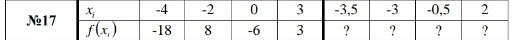

In [3]:
x=np.array([-4.,-2.,0.,3.], dtype=float)
y=np.array([-18.,8.,-6.,3.], dtype=float)
x1, x2, x3, x4 = -3.5, -3, -0.5, 2      # точка, в якій потрібно обчислити значення
def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i
    for i in range(n):
        # обчислюємо багаточлен L_i, який складається з n членів
        # кожен член дорівнює  (x-x_j)/(x_i-x_j) для j=0..n, j!=i
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p) # повертаємо значення багаточлена

# обчислюємо інтерполяційний багаточлен та його значення у точці x_test
f1 = lagrange_interpolation(x, y, x1)
print("Значення функції у точці x_1 =", f1.round(4))

f2 = lagrange_interpolation(x, y, x2)
print("Значення функції у точці x_2 =", f2.round(4))

f3 = lagrange_interpolation(x, y, x3)
print("Значення функції у точці x_3 =", f3.round(4))

f4 = lagrange_interpolation(x, y, x4)
print("Значення функції у точці x_4 =", f4.round(4))


Значення функції у точці x_1 = -5.125
Значення функції у точці x_2 = 3.0
Значення функції у точці x_3 = -1.375
Значення функції у точці x_4 = -12.0


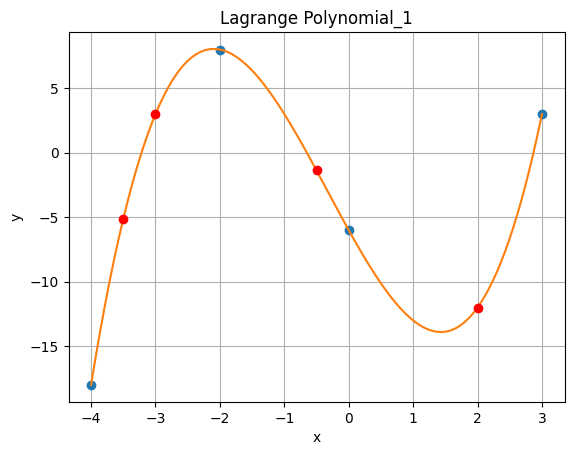

In [4]:
xnew=np.linspace(np.min(x),np.max(x),100) #точки, за якими будуємо графік
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.plot(x,y,'o',xnew,ynew) #будуємо графік функції Лагранжа

plt.plot(x1,f1,'ro')
plt.plot(x2,f2,'ro')
plt.plot(x3,f3,'ro')
plt.plot(x4,f4,'ro')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Lagrange Polynomial_1')
plt.grid(True)
plt.show()

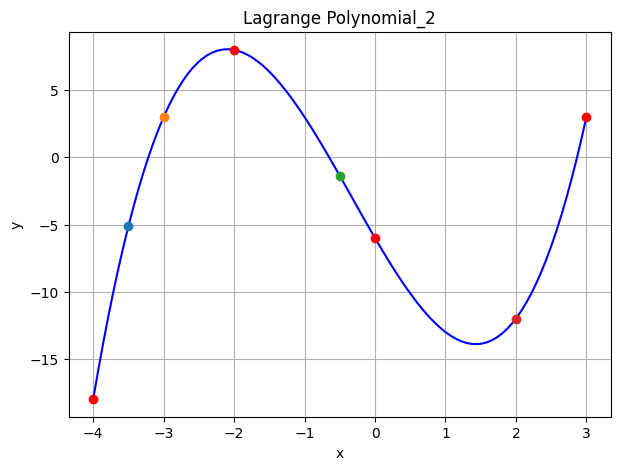

In [5]:
from scipy.interpolate import lagrange

#Перевірка
f = lagrange(x, y)
fig = plt.figure(figsize = (7,5))
plt.plot(xnew, f(xnew), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial_2')

plt.plot(x1,f1,'o')
plt.plot(x2,f2,'o')
plt.plot(x3,f3,'o')
plt.plot(x4,f4,'o')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Приклад

In [23]:
from scipy.interpolate import lagrange

# Таблиця значень функції
x = [     -4,     -3.5,       -3,       -2,       -0.5,     0,       2,       3]
f = [-175, -50, 25, 75, -10, -60, -120, 30]

d = len(x)

a = []
L = []
# Формуємо коефіцієнти та складові частини полінома
for j in range(d):
    p = 1
    s = ''
    for i in range(d):
        if i == j:
            continue
        else:
            p = p * (x[j] - x[i])
            s = s + '(x-' + str(x[i]) + ')'
    k = f[j]/p
    a.append(k)
    L.append(s)

# Формуємо поліном
polynom_string = 'L(x) = '
for i in range(d):
    polynom_string = polynom_string + str(a[i]) + '*' + L[i] + '+'
polynom_string = polynom_string[:-1].replace('+-', '-')

# Відображаємо поліном
print('Інтерполяційний поліном Лагранжа')
print(polynom_string)

Інтерполяційний поліном Лагранжа
L(x) = 0.2976190476190476*(x--3.5)(x--3)(x--2)(x--0.5)(x-0)(x-2)(x-3)-0.3552003552003552*(x--4)(x--3)(x--2)(x--0.5)(x-0)(x-2)(x-3)-0.2222222222222222*(x--4)(x--3.5)(x--2)(x--0.5)(x-0)(x-2)(x-3)+0.4166666666666667*(x--4)(x--3.5)(x--3)(x--0.5)(x-0)(x-2)(x-3)+0.058049886621315196*(x--4)(x--3.5)(x--3)(x--2)(x-0)(x-2)(x-3)-0.23809523809523808*(x--4)(x--3.5)(x--3)(x--2)(x--0.5)(x-2)(x-3)+0.03636363636363636*(x--4)(x--3.5)(x--3)(x--2)(x--0.5)(x-0)(x-3)+0.0020931449502878076*(x--4)(x--3.5)(x--3)(x--2)(x--0.5)(x-0)(x-2)


           7          6         5         4         3         2
-0.004725 x - 0.1018 x - 0.278 x + 1.392 x + 14.16 x + 5.434 x - 100.6 x - 60


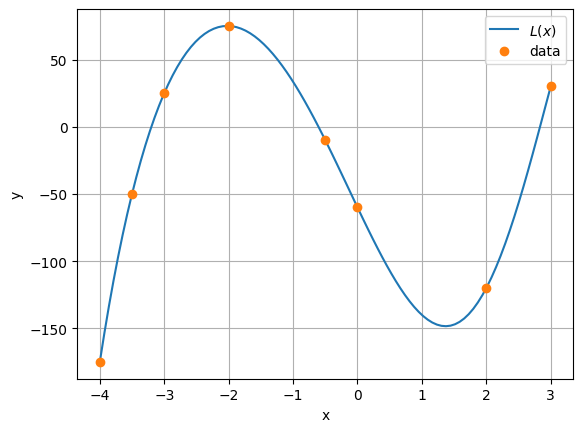

In [22]:

# Таблиця значень функції
x = np.array([     -4,     -3.5,       -3,       -2,       -0.5,     0,       2,       3])
y = np.array([-175, -50, 25, 75, -10, -60, -120, 30])
# Інтерполяційний поліном Лагранжа
p =lagrange(x, y)
print(p)

# Формуємо точки для відображення полінома
z = np.linspace(np.min(x), np.max(x), 100)

# Відображаємо поліном та задані точки
plt.plot(z,p(z),'-')
plt.plot(x,y,'o')
plt.legend(['$L(x)$','data'])
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y'); plt.show()